In [61]:
import nltk
import nltk.corpus  
import nltk.collections
import nltk.text 
import matplotlib.pyplot as plt
import nltk
import re
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.draw.dispersion import dispersion_plot
nltk.download('machado')

[nltk_data] Downloading package machado to /home/vini/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [62]:
# no nosso caso estamos usando id machado
nltk_id = 'machado'

# eh necessario baixar o corpus
nltk.download(nltk_id)

# agora o corpus esta acessivel 
# visualizando as obras disponiveis
print(nltk.corpus.machado.readme())
# ou
print(nltk.corpus.machado.fileids())

# apos escolher a obra
# salvamos a string em uma variavel
dom_casmurro = nltk.corpus.machado.raw('romance/marm05.txt')

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

[nltk_data] Downloading package machado to /home/vini/nltk_data...
[nltk_data]   Package machado is already up-to-date!


In [63]:
nltk.download('stopwords')

# retorna lista de stopwords em portugues
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/vini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

20 palavras mais frequentes:
[('capítulo', 209), ('virgília', 202), ('disse', 187), ('coisa', 148), ('olhos', 138), ('nada', 126), ('outro', 124), ('vida', 118), ('outra', 116), ('tempo', 114), ('porque', 113), ('menos', 112), ('homem', 108), ('casa', 107), ('mim', 100), ('tudo', 99), ('pouco', 98), ('então', 96), ('tão', 95), ('dia', 93)]


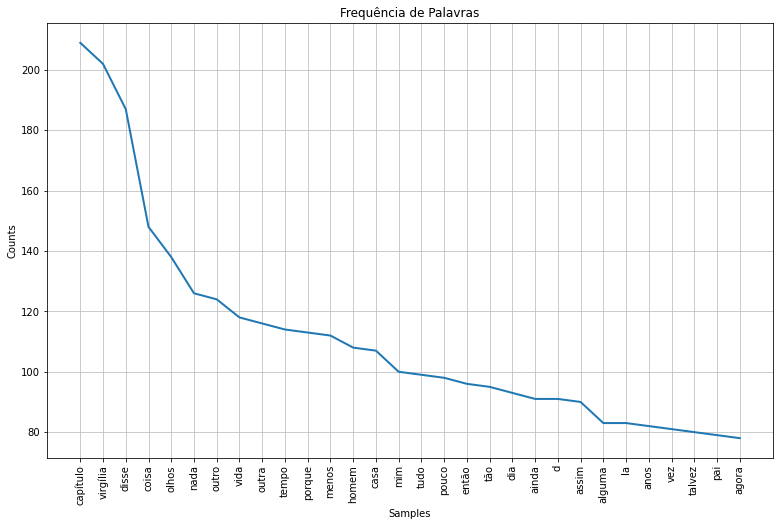

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [65]:
texto = pre_processamento(dom_casmurro)

# tokenizando 
tokens = word_tokenize(texto)

# contagem de frequencia
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# plot
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")

In [66]:
dom_casmurro_tok = nltk.Text(word_tokenize(pre_processamento(dom_casmurro)))
print(dom_casmurro_tok.concordance('capítulo'))

Displaying 25 of 209 matches:
dar pago piparote adeus brás cubas capítulo primeiro óbito autor algum tempo h
 expor sumariamente caso julgue si capítulo ii emplasto efeito dia manhã estan
itor militar cônego volto emplasto capítulo iii genealogia falei dois tios dei
mos sucessos acabemos vez emplasto capítulo iv idéia fixa idéia tantas cabriol
z graúda castelã comparação presta capítulo v aparece orelha senhora senão est
sa contemporâneas anônima primeiro capítulo tal cuja imaginação semelhança ceg
 enfermo vejo assomar porta alcova capítulo vi chimène qui l dit rodrigue qui 
on nascido gavião delírio começava capítulo vii delírio conste ainda ninguém r
stes fenômenos mentais pode saltar capítulo vá direito narração menos curioso 
o brincava porta alcova bola papel capítulo viii razão contra sandice leitor c
 deitou língua ar surriada andando capítulo ix transição vejam agora destreza 
 engomada chocha vamos dia outubro capítulo x naquele dia naquele dia árvore c
s bênçãos porque conta

In [67]:
dom_casmurro_tok.similar("virgília")

lá alcova disse medo quê superficial contrário


In [68]:
dom_casmurro_tok.collocations()

quincas borba; lobo neves; brás cubas; alguma coisa; nhã loló; dia
seguinte; outra vez; alguns instantes; cinco contos; rio janeiro;
outra coisa; coisa nenhuma; mesma coisa; muitas vezes; primeiros dias;
nesta página; meia dobra; idéia fixa; alma sensível; ponta nariz


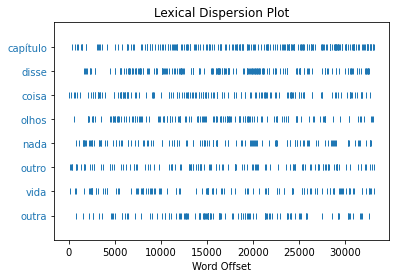

In [69]:
targets=['capítulo', 'disse', 'coisa', 'olhos', 'nada', 'outro', 'vida', 'outra']
my_plot = dispersion_plot(dom_casmurro_tok, targets, ignore_case=True)
if [label.get_text() for label in my_plot.get_yticklabels()] != reversed(targets):
    my_plot.set_yticks(list(range(len(targets))), reversed(targets))
plt.show()